# 1. Load Data and Modules

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic

In [85]:
pd.options.display.max_columns = 30

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
combine = pd.concat([train.drop('Survived',1),test])

# 2. Initial Exploration

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


PassengerId는 승객의 인덱스, Survived는 생사 여부를 나타냄 (0,1)
* Pclass: 승객의 티켓 클래스, 각각 1, 2, 3등급을 나타냄 (ordinal)
* Name: 승객의 이름 변수. 성을 통해 가족관계 유추가 가능하고 Mr, Mrs와 같은 title로 나이를 유추할 수 있다.(text string -> 변환 필요)
* Sex: 승객의 성별(category)
* Age: 승객의 나이, NaN 값이 존재한다.(integer)
* SibSp: 형제 + 배우자 숫자를 나타내는 변수(ordinal)
* Parch: 부모님 + 아이들 (ordinal)
* Ticket: 티켓넘버(text string)
* Fare: 요금(float)
* Cabin: 캐빈넘버(text string), NaN값 존재
* Embarked: 승선한 항구 변수(category), NaN값 존재



* 요약하자면 변수의 종류와 각각의 개수는 float-1개(Fare), ordinal-3개(Pclass, SibSp, Parch), integer-1개(Age), category-2개(Sex, Embarked), text string-3개(Name, Ticket, Cabin)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pclass, age, SibSp, Parch, Fare 변수의 평균, 최소, 최대값들은 위와 같다.

## Missing values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* training data에서는 Cabin 변수의 687개가 NaN값이다. 또한 Age 변수 177개, Embarked 변수 2개도 NaN이다.
* test data에서도 Cabin-327개, Age-86개, Fare-1개가 NaN이다.

In [8]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = 'blue'
nosurv_col ='red'

print('Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i'
     %(len(surv), 1*len(surv)/len(train)*100.0,
      len(nosurv), 1*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


training data를 보면 Survived가 38.4%, Not Survived가 61.6%로 균등하지 않다.
균등하게 만들어 주어야 분류가 더 잘된다.

이제 summary dashboard를 만들어 train data의 변수들을 하나씩 관찰해보자.

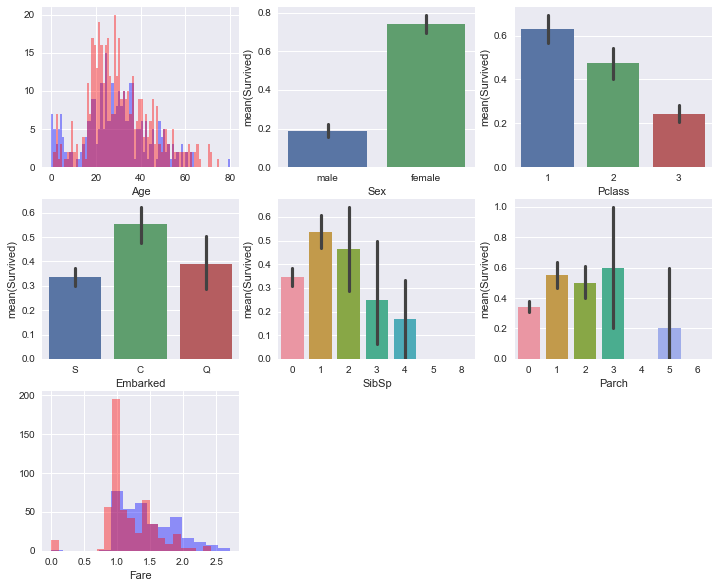

In [9]:
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0,81,1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0,81,1), kde=False, color=nosurv_col)
plt.xlabel('Age')
plt.subplot(332)
sns.barplot('Sex','Survived',data=train)
plt.subplot(333)
sns.barplot('Pclass','Survived',data=train)
plt.subplot(334)
sns.barplot('Embarked','Survived',data=train)
plt.subplot(335)
sns.barplot('SibSp','Survived', data=train)
plt.subplot(336)
sns.barplot('Parch','Survived', data=train)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col)
plt.xlabel('Fare')
plt.show()

* Age : 18 ~ 30세 사람들의 생존률이 낮고, 10세 미만의 아이들은 생존률이 높다
* Pclass: 높은 등급일수록 살아남을 확률이 높다.
* SibSp & Parch: SibSP - 1~2명, Parch - 1~3명인 사람들의 생존률이 높다.
* Embarked: C에서 승선한 사람들의 생존률이 S와 Q에서 승선한 사람들의 생존률보다 높다.
* Fare: 낮은 요금의 사람들이 낮은 생존확률을 갖고 있따.

* 추가: SibSp 같은 경우 차이가 제대로 보이지 않는다. 이런 경우 cross table 이용한다.

In [10]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


3명 이상의 SibSp를 갖고 있는 승객의 생존률은 매우 낮다. 하지만 상대적으로 표본 자체가 작아서 의미가 있는 것인지 알아볼 필요가 있다.


binomial distribution test를 해봄으로써 (15 vs 3, 5 vs 0, 7 vs 0)의 결과가 38%라는 생존률에 반하는 결과인지 알아본다.

In [11]:
stats.binom_test(x=15,n=18,p=0.62),stats.binom_test(x=5,n=5,p=0.62),stats.binom_test(x=7,n=7,p=0.62)

(0.086866861757821739, 0.16417601599999998, 0.04942776579456)

0.05 이상의 값인 경우 가정한 확률 분포를 부정할 수 없다. 따라서 SibSp = 4, 5는 다르게 행동하는 변수라고 볼 수 없다. SibSp의 경우에는 0.049라는 값을 갖아서 가정을 부정하지만 미미한 차이이므로 가정에 부합한다고 볼 수 있다.

In [12]:
tab = pd.crosstab(train['Parch'],train['Survived'])
print(tab)

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


In [13]:
stats.binom_test(x=4,n=4,p=0.62)

0.30469727999999996

# Cabin numbers

Cabin 변수는 없는 값들이 많고, 각각의 형태와 숫자도 다른 까다로운 변수다.

In [14]:
print('{} of {} Cabin numbers({:.1f}%) are not NaN in training data set'.format(len(train['Cabin'].dropna()),len(train),len(train['Cabin'].dropna())/len(train)*100))
print('{} of {} Cabin numbers({:.1f}%) are not NaN in testing data set'.format(len(test['Cabin'].dropna()),len(test),len(test['Cabin'].dropna())/len(test)*100))
train.loc[:,['Survived','Cabin']].dropna().head(8)

204 of 891 Cabin numbers(22.9%) are not NaN in training data set
91 of 418 Cabin numbers(21.8%) are not NaN in testing data set


,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27


* 맨 앞글자를 따와서 새로운 변수를 만들 수 있을듯 (ex: C85 -> C)
* 그런데 NaN이 너무 많음
* 왜 어떤 사람은 여러 Cabin 값을 갖는지 의미를 찾아보자.

# Ticket numbers

전부 다른 값을 갖는 것처럼 보인다. 우선unique한 값이 몇 개인지 알아보자.

In [15]:
print('There are {} unique ticket numbers among the {} tickets'.format(train['Ticket'].nunique(), len(train['Ticket'])))

There are 681 unique ticket numbers among the 891 tickets


In [16]:
grouped = train.groupby('Ticket')
k=0
for name, group in grouped:
    if (len(grouped.get_group(name))>1):
        print(group.loc[:,['Survived','Name','Fare']])
        k += 1
    if (k>10):
        break

     Survived                                               Name  Fare
257         1                               Cherry, Miss. Gladys  86.5
504         1                              Maioni, Miss. Roberta  86.5
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...  86.5
     Survived                                    Name   Fare
262         0                       Taussig, Mr. Emil  79.65
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)  79.65
585         1                     Taussig, Miss. Ruth  79.65
     Survived                            Name  Fare
110         0  Porter, Mr. Walter Chamberlain  52.0
475         0     Clifford, Mr. George Quincy  52.0
     Survived                                             Name     Fare
329         1                     Hippach, Miss. Jean Gertrude  57.9792
523         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)  57.9792
     Survived                                    Name  Fare
166         1  Chibnall, Mrs. (Edith Mar

가정: 가족들이 생존했다면 생존했을 것이다.(남자가 아니라면)
흔한 성의 경우 가족인지 알기 힘들고, 꼭 같은 성을 갖는 사람끼리 티켓을 공유하는 것은 아니다. 
Ticket은 좋은 변수가 될 수 있다. 같은 그룹끼리는 티켓 가격이 같다.

# 3. Relations between features

각 변수들간의 관계를 살펴보자.
Heatmap을 통해 변수간의 correlation을 시각화해보자. 붉은색일수록 양의 상관관계가 있는 것이고 푸른색일수록 음의 상관관계가 있는 것이다.

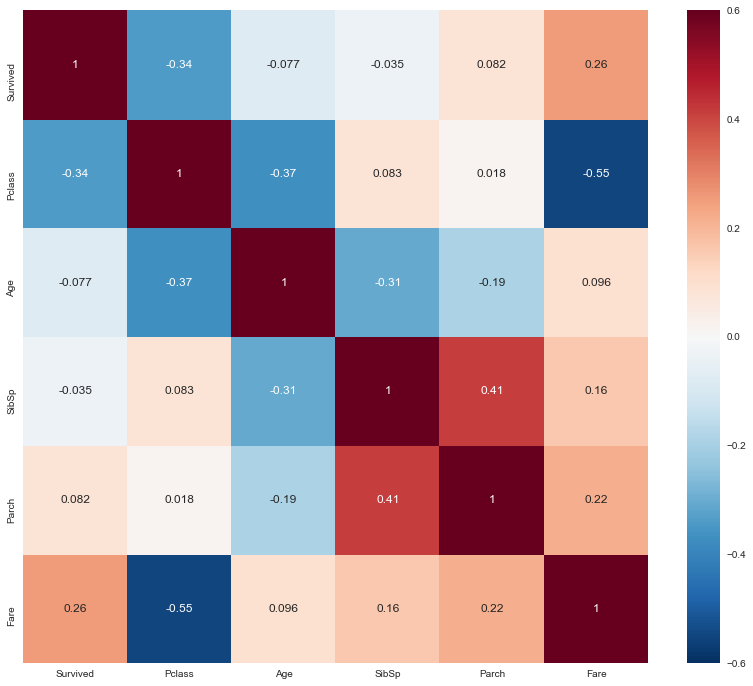

In [17]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=0.6,annot=True)
plt.show()

발견한 사실:

* Pclass는 Fare와 상관관계가 있다.
* SibSp와 Parch는 약한 상관관계가 있다.
* Pclass와 Survived의 관계는 주목할 만하다.

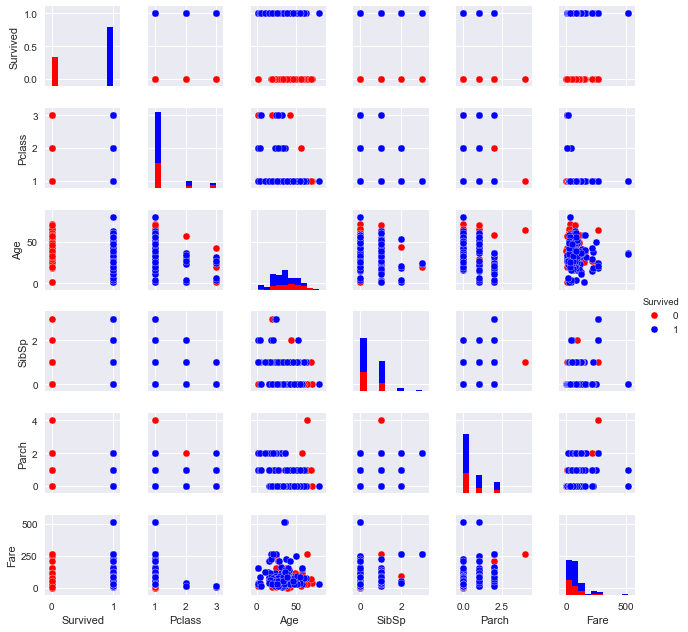

In [18]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
g = sns.pairplot(data=train.dropna(), vars=cols, size=1.5, hue='Survived', palette=[nosurv_col, surv_col])
plt.show()

** Age vs Sex **

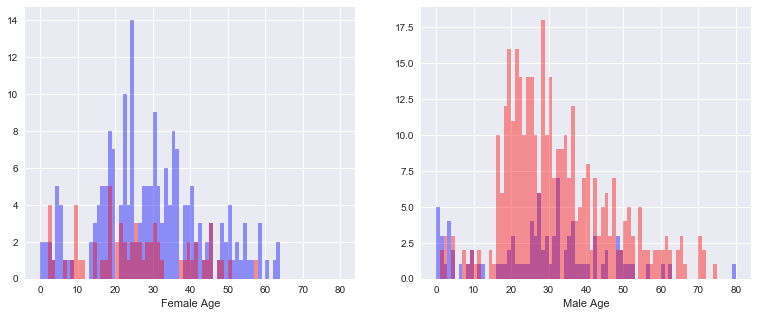

In [19]:
msurv = train[(train.Survived == 1) & (train.Sex == 'male')]
fsurv = train[(train.Survived == 1) & (train.Sex == 'female')]
mnosurv = train[(train.Survived == 0) & (train.Sex == 'male')]
fnosurv = train[(train.Survived == 0) & (train.Sex == 'female')] 

plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv.Age.dropna().values, bins=range(0,81,1),kde=False, color=surv_col)
sns.distplot(fnosurv.Age.dropna().values, bins=range(0,81,1),kde=False, color=nosurv_col)
plt.xlabel('Female Age')

plt.subplot(122)
sns.distplot(msurv.Age.dropna().values, bins=range(0,81,1),kde=False, color=surv_col)
sns.distplot(mnosurv.Age.dropna().values, bins=range(0,81,1),kde=False,color=nosurv_col)
plt.xlabel('Male Age')
plt.show()

** 발견한 사실: **

* female의 경우 18 ~ 30세에서 생존확률이 높고, male의 경우에는 반대로 생존확률이 가장 낮다. Sex와 Age를 각각 따로 관찰할 때보다 의미있는 해석이 가능하다.
* male은 어린 아이들의 생존률이 성인보다 높고 female에서는 나이와 상관없이 비슷하다.

** Pclass vs Age **

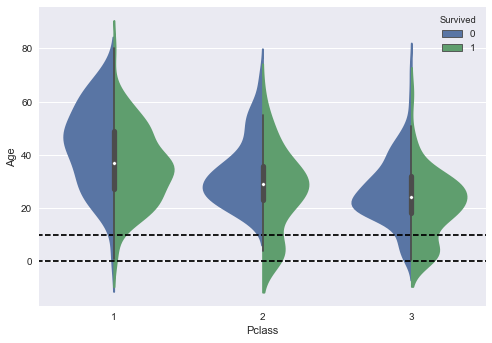

In [20]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True)
plt.hlines([0,10],xmin=-1, xmax=3, linestyles='--')

** 발견한 사실: **

* Pclass가 큰 값일수록 Age가 감소한다.
* 1st class에서 젊은 사람의 생존률이 나이 많은 사람보다 높다.
* 2nd class의 10대는 거의 생존했고, 3rd에서도 대부분 생존했다.

** Pclass vs Sex **

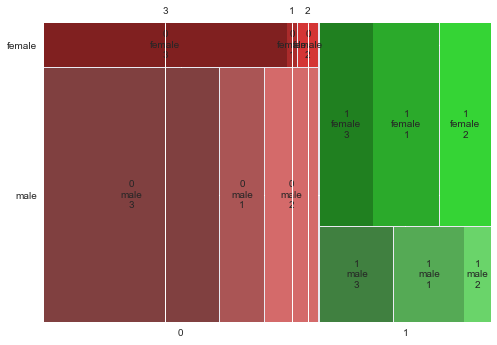

In [21]:
dummy = mosaic(train,['Survived','Sex','Pclass'])

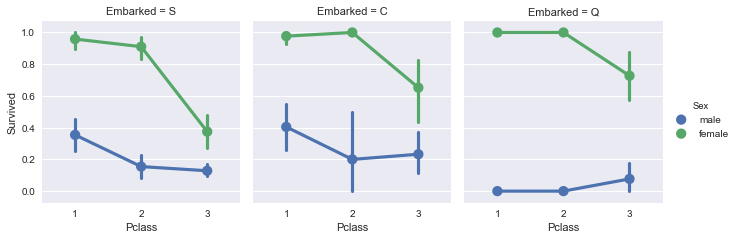

In [22]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked',
                  data=train, aspect=0.9, size=3.5, ci=95)

** 발견한 사실: **

* 대부분의 생존하지 못한 female은 3rd class 승객이다.
* male은 1st class가 높은 생존률을 보이고 나머지는 비슷한 생존률을 보인다.
* 3rd class를 제외하고 Embarked가 Q이면 male과 female이 100% 나뉘어 있다. 

** Pclass vs Embarked **

Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


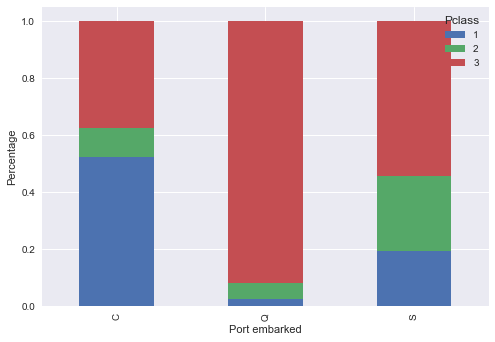

In [23]:
tab = pd.crosstab(combine['Embarked'], combine['Pclass'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

** 발견한 사실 **

* "C" 항구에서 탑승한 사람 중 가장 높은 class 비율은 1st이다.
* "Q" 항구에서 탑승한 사람의 대부분은 3rd class이다. 따라서 위 factor plot에서 발견한 사실은 의미가 작다.

위에서 Q가 S보다 생존률이 약간 높다는 것을 보았다. 큰 차이는 아니지만 그래도 S에 1st, 2nd 승객이 많음에도 불구하고 Q가 생존률이 높다는 것은 주목해볼 점이다.

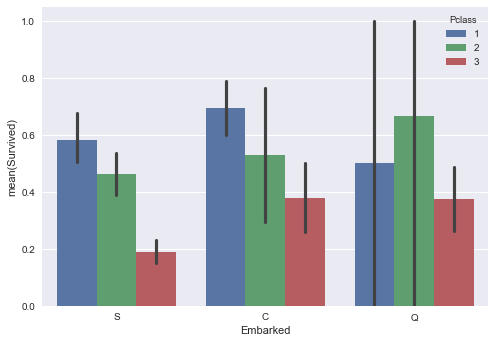

In [24]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train)

주목할 점은 S 항구에서 탑승한 3rd class 고객들의 생존률이 매우 낮다는 점이다.

Pclass에서는 포착되지 않는 어떤 효과가 있는 것 같다. 이제 Sex와의 관계를 살펴보자.

Sex       female  male
Embarked              
C            113   157
Q             60    63
S            291   623


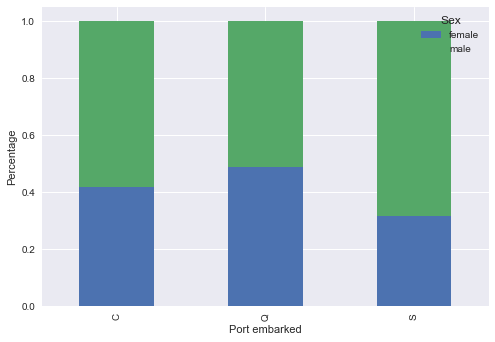

In [25]:
tab = pd.crosstab(combine['Embarked'], combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

이 그래프를 통해 S 항구와 다른 항구 간에 어떤 차이가 있는지 알 수 있다. C 항구에는 1st class 고객이 많이 타는 것이었고, S 항구에는 남자가 많이 탑승하는 것이었다. 항구 자체의 영향은 없는 것 같아 보인다.

그러나 밑에 그래프를 살펴보면 Sex와 Pclass가 큰 상관관계가 보인다.

Sex     female  male
Pclass              
1          144   179
2          106   171
3          216   493


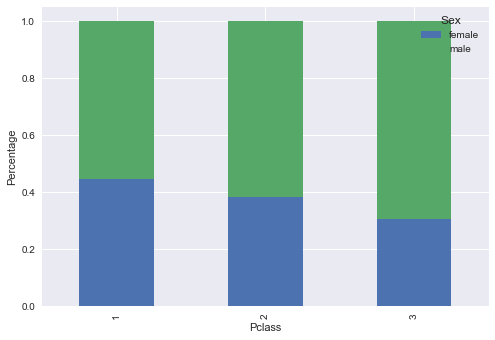

In [26]:
tab = pd.crosstab(combine['Pclass'],combine['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
dummy = plt.ylabel('Percentage')

아마 3rd class에 탑승한 male은 혼자 여행하는 것이 아닐까?

Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


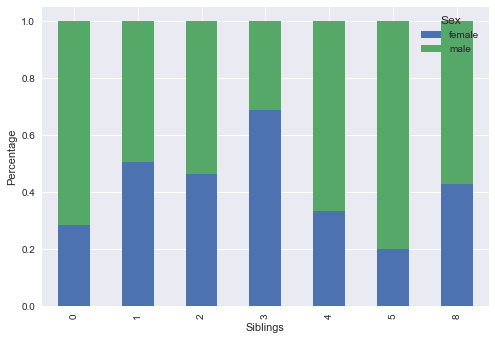

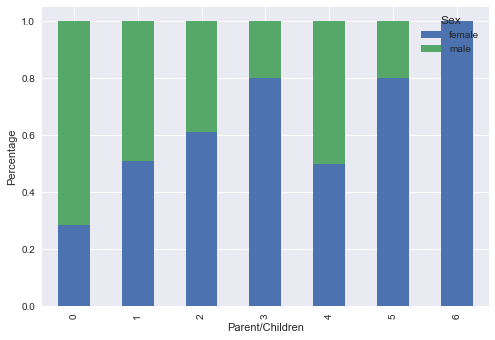

In [27]:
sib = pd.crosstab(train['SibSp'], train['Sex'])
print(sib)
dummy = sib.div(sib.sum(1), axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Siblings')
dummy = plt.ylabel('Percentage')

parch = pd.crosstab(train['Parch'], train['Sex'])
print(parch)
dummy = parch.div(parch.sum(1), axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Parent/Children')
dummy = plt.ylabel('Percentage')

약간 그렇게 보이기도 한다. SibSp = 1~3 일때 생존률이 높았던 게 설명이 된다. 하지만 Parch 변수까지 설명하지는 못한다.

** 발견한 사실 **
* 항구를 뜯어본 결과 Sex와 Pclass가 차이가 있었다. S 항구는 많은 남자와 적은 1st class 승객이 탑승해서 생존률이 낮았고, C 항구는 많은 여자와 많은 1st class 승객이 탑승해 상대적으로 생존률이 높았다.
* 지금까지 살펴본 것으로 Embarked 변수의 실제 영향력을 이야기 하기는 어렵다. 밑에서 다시 살펴볼 것이다.

마지막으로 ** Age vs Embarked ** 를 살펴보자

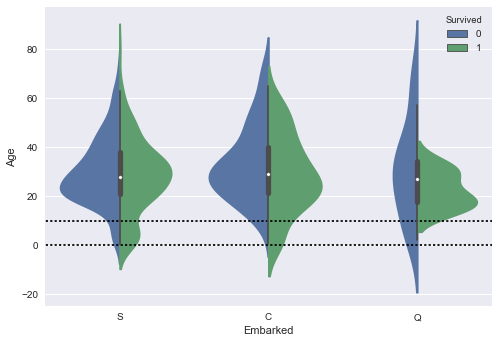

In [28]:
sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles='dotted')

Q 항구에서 탑승한 승객 중 생존한 사람들을 주목해서 살펴볼 필요가 있다. 굉장히 좁은 범위의 사람들만 살아남았다. 아이들이 많이 생존하지 못했지만 애초에 아이들이 많이 타지도 않았다.

** 발견한 사실 **
* Age 변수는 Pclass와 Sex 변수만큼 Embarked와 상관 관계를 갖고 있지 않다.

** Fare vs Pclass **

C:\Users\poioi\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log10
C:\Users\poioi\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log10
C:\Users\poioi\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log10


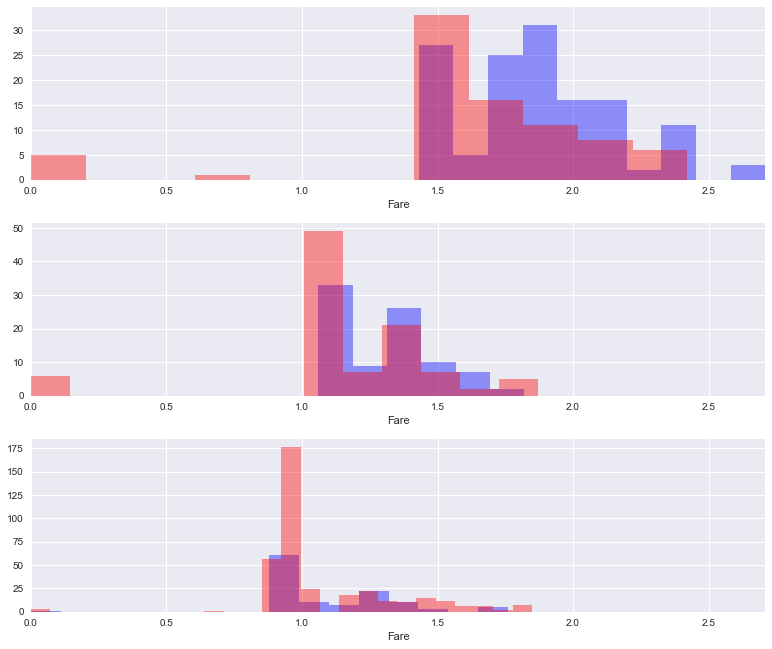

In [29]:
plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values +1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1),kde=False, color=nosurv_col, axlabel='Fare')
ax1.set_xlim(0, np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values +1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1),kde=False, color=nosurv_col, axlabel='Fare')
ax2.set_xlim(0, np.max(np.log10(train['Fare'].dropna().values)))
plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values +1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1),kde=False, color=nosurv_col, axlabel='Fare')
ax3.set_xlim(0, np.max(np.log10(train['Fare'].dropna().values)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.1, right=0.95, hspace=0.25, wspace=0.35)

** 발견한 사실 **
* 1st class의 요금분포가 넓다. 비쌀수록 생존률이 높게 나타난다.
* 2nd class의 bimodality와 3rd class의 long tail이 흥미롭다.
* 각 class에서 싼 티켓일수록 생존률이 낮게 나타난다. 밑에 boxplot에서도 확인 가능하다.

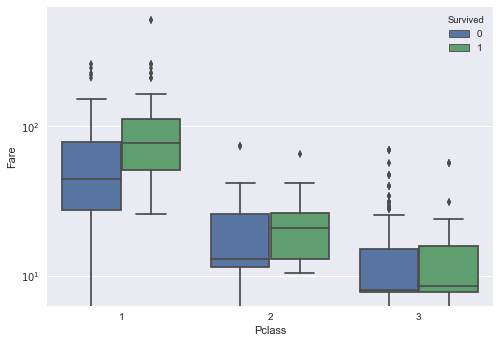

In [30]:
ax = sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=train)
ax.set_yscale('log')

# 4. Filling in missing values

이제 위에서 살펴본 변수간의 관계를 활용해 NaN을 채우자.

Embarked 변수를 먼저 채우자. Cabin같은 경우는 너무 많은 값들이 누락되어 있고, Age는 밑에서 다른 방법으로 접근할 것이다. test data set에서 누락된 1개의 Fare 변수의 값도 채울 것이다.

누락된 2명의 승객 Embarked 값을 채워보자.

In [31]:
print(train[train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [32]:
combine.where((combine['Pclass'] < 1.5) & (combine['Sex'] == 'female')).groupby(['Embarked','Pclass','Sex','Parch','SibSp']).size()

Embarked  Pclass  Sex     Parch  SibSp
C         1.0     female  0.0    0.0      30
                                 1.0      20
                          1.0    0.0      10
                                 1.0       6
                          2.0    0.0       2
                                 2.0       2
                          3.0    1.0       1
Q         1.0     female  0.0    1.0       2
S         1.0     female  0.0    0.0      20
                                 1.0      20
                                 2.0       3
                          1.0    0.0       7
                                 1.0       6
                          2.0    0.0       4
                                 1.0       5
                                 3.0       3
                          4.0    1.0       1
dtype: int64

이 두 여성의 경우에는 'C'나 'S' 항구에서 탑승했을 가능성이 높다. 같은 조건을 갖고 있는 여성들이 C에서는 30명이고 S에서는 20명이다. 반면에 1st class에서 탑승한 여성은 C에서 71명이고 S에서는 69명으로 큰 차이가 없다. 

아래에서는 항구별 한 사람당 티켓가격의 분포를 알아보았다.

In [33]:
train['fare_per_person'] = train['Fare'] / (train['SibSp']+train['Parch']+1)

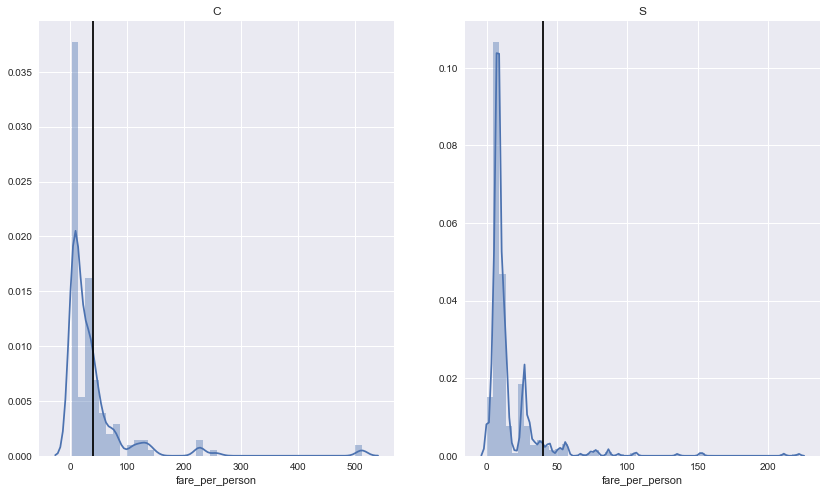

In [34]:
plt.figure(figsize=[14,8])
plt.subplot(121)
sns.distplot(train.fare_per_person[(train.Embarked == 'C')])
plt.axvline(x=40, color='black')
plt.title('C')
plt.subplot(122)
sns.distplot(train.fare_per_person[(train.Embarked == 'S')])
plt.axvline(x=40, color='black')
plt.title('S')

각 여성의 티켓 가격을 40으로 보았을 경우 Embarked=='C' 로 보는 것이 더 타당하다고 생각된다. 

In [35]:
train['Embarked'].iloc[61] = 'C'
train['Embarked'].iloc[829] = 'C'

C:\Users\poioi\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


60세의 남성이고 3rd class에 탑승하였다. 전체 3rd class의 fare median 값을 imputation 해준다.

In [37]:
test['Fare'].iloc[152] = combine['Fare'][combine['Pclass'] == 3].dropna().median()
print(test['Fare'].iloc[152])

8.05


C:\Users\poioi\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Derived (engineered) features

존재하는 변수들을 활용해 확실한 분류를 도와줄 새로운 변수를 만들어낸다. 

In [38]:
combine = pd.concat([train.drop('Survived',1),test])
survived = train['Survived']

combine['Child'] = combine['Age']<=10
combine['Cabin_known'] = combine['Cabin'].isnull() == False
combine['Age_known'] = combine['Age'].isnull() == False
combine['Family'] = combine['SibSp'] + combine['Parch']
combine['Alone'] = (combine['SibSp'] + combine['Parch']) == 0
combine['Large_Family'] = (combine['SibSp'] > 2) | (combine['Parch']>3)
combine['Deck'] = combine['Cabin'].str[0]
combine['Deck'] = combine['Deck'].fillna('U')
combine['Ttype'] = combine['Ticket'].str[0]
combine['Title'] = combine['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
combine['Fare_cat'] = pd.DataFrame(np.floor(np.log10(combine['Fare']+1))).astype('int')
combine['Bad_ticket'] = combine['Ttype'].isin(['3','4','5','6','7','8','A','L','W'])
combine['Young'] = (combine['Age']<=30) | (combine['Title'].isin(['Master','Miss','Mlle']))
combine['Shared_ticket'] = np.where(combine.groupby('Ticket')['Name'].transform('count')>1,1,0)
combine['Ticket_group'] = combine.groupby('Ticket')['Name'].transform('count')
combine['Fare_eff'] = combine['Fare'] / combine['Ticket_group']
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']>16.0, 2, 1)
combine['Fare_eff_cat'] = np.where(combine['Fare_eff']<8.5, 0, combine['Fare_eff_cat'])

test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

surv = train[train['Survived'] ==1]
nosurv = train[train['Survived'] ==0]

C:\Users\poioi\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### * Child *

Pclass    1    2    3
Child                
False   213  167  447
True      3   17   44
Sex    female  male
Child              
False     283   544
True       31    33


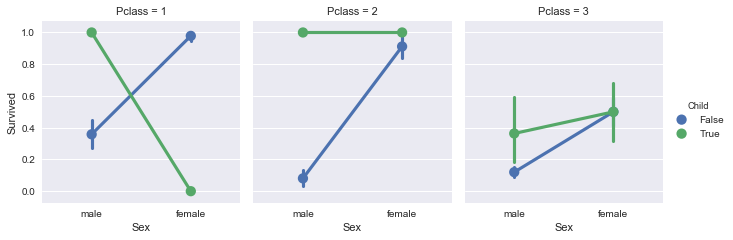

In [39]:
g = sns.factorplot(x='Sex', y='Survived', hue='Child', col='Pclass', data=train, aspect=0.9, size=3.5, ci=95.0)
tab = pd.crosstab(train['Child'], train['Pclass'])
print(tab)
tab = pd.crosstab(train['Child'], train['Sex'])
print(tab)

Pclass == 1을 살펴보면 어린 아이가 3명밖에 되지 않는다. 다른 클래스 그래프들을 살펴보면 더 흥미로운 점이 발견된다.

** 발견한 사실 **
* 남자 어린아이들은 2nd, 3rd class에서 생존 확률이 높다.

### * Cabin_known *

Survived       0    1
Cabin_known          
False        481  206
True          68  136


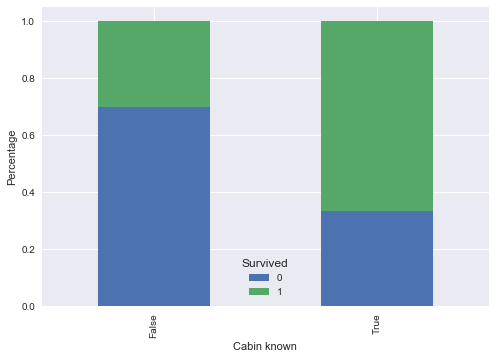

In [40]:
cab = pd.crosstab(train['Cabin_known'], train['Survived'])
print(cab)
dummy = cab.div(cab.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
dummy = plt.xlabel('Cabin known')
dummy = plt.ylabel('Percentage')

살아남은 승객의 객실을 알기가 더 쉽다.

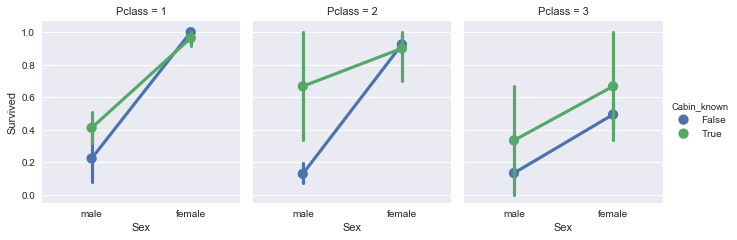

In [41]:
g = sns.factorplot(x='Sex', y='Survived', hue='Cabin_known', col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

하지만 Sex 변수까지 고려해서 살펴보면 확신할 수 없다.

** 발견한 사실 **
남자 승객과 3rd class 승객들에게서 트렌드가 보이지만 불확실성이 높다. 모델링 단계에서 체크해 봐야한다.

### * Deck *

Survived    0    1
Deck              
A           8    7
B          12   35
C          24   35
D           8   25
E           8   24
F           5    8
G           2    2
T           1    0
U         481  206


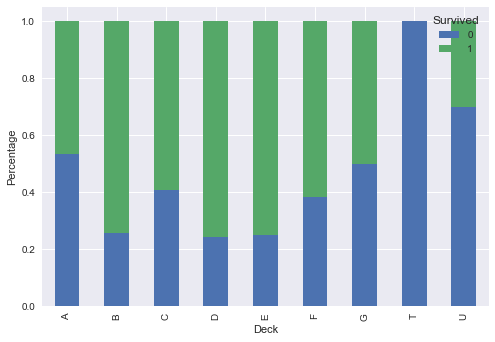

In [42]:
tab = pd.crosstab(train['Deck'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Deck')
dummy = plt.ylabel('Percentage')

B, D, E의 경우 생존 확률이 약 66%로 가장 높다. 다음으로 C와 F는 60%이고 A와 G는 약 50%이다. 한명이 속했던 T에서는 생존률이 0%인데 이는 덜 중요하게 작용한다.

이제 가장 많은 사람이 속한 B와 C를 살펴보자.

In [43]:
stats.binom_test(x=12,n=47,p=24/(24.+35.))

0.037415527401218264

p-value가 3.7%로 B와 C에서의 생존률은 서로 다른 확률 분포를 따른다고 볼 수 있다.

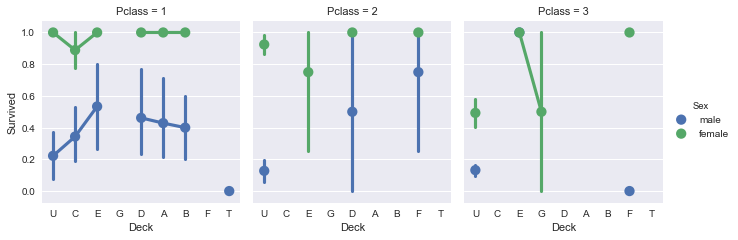

In [44]:
g = sns.factorplot(x='Deck', y='Survived', hue='Sex', col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

### * Ttype and Bad_ticket *

In [45]:
print(train['Ttype'].unique())
print(test['Ttype'].unique())

['A' 'P' 'S' '1' '3' '2' 'C' '7' 'W' '4' 'F' 'L' '9' '6' '5' '8']
['3' '2' '7' 'A' '6' 'W' 'S' 'P' 'C' '1' 'F' '4' '9' 'L']


Survived    0   1
Ttype            
1          54  92
2          98  85
3         229  72
4           8   2
5           3   0
6           5   1
7           8   1
8           2   0
9           0   1
A          27   2
C          31  16
F           3   4
L           3   1
P          23  42
S          44  21
W          11   2


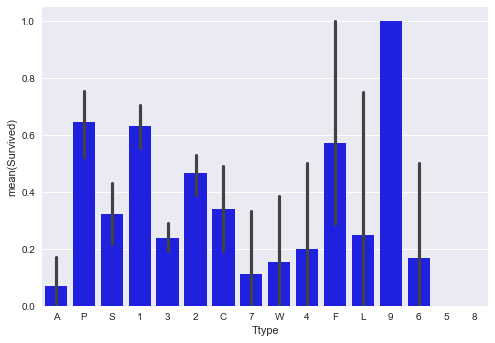

In [46]:
tab = pd.crosstab(train['Ttype'], train['Survived'])
print(tab)
sns.barplot(x='Ttype', y='Survived', data=train, ci=95.0, color='blue')

위에서 평균 생존률인 38% 이하이 Ttype을 Bad_ticket으로 정의했다.

Survived      0    1
Bad_ticket          
False       253  261
True        296   81


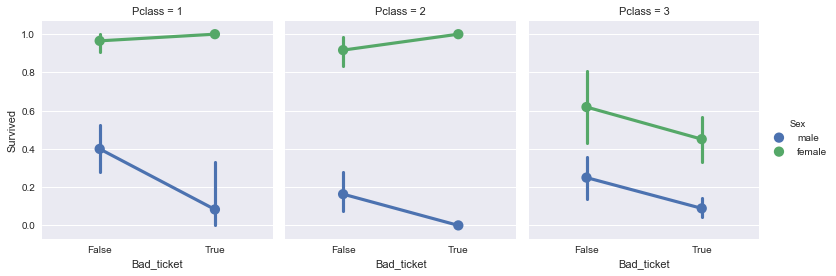

In [47]:
tab = pd.crosstab(train['Bad_ticket'], train['Survived'])
print(tab)
g = sns.factorplot(x='Bad_ticket', y='Survived', hue='Sex', col='Pclass',
                  data=train, aspect=0.9, ci=99.0)

factorplot을 통해 살펴본 결과 bad_ticket은 male 승객과 3rd class 승객의 생존률에 더 악영향을 끼쳤다. 뚜렷한 효과는 보이지 않지만 경향성은 확인해볼 수 있다.

Bad_ticket  False  True 
Deck                    
A              14      1
B              44      3
C              56      3
D              24      9
E              27      5
F               9      4
G               2      2
T               1      0
U             337    350


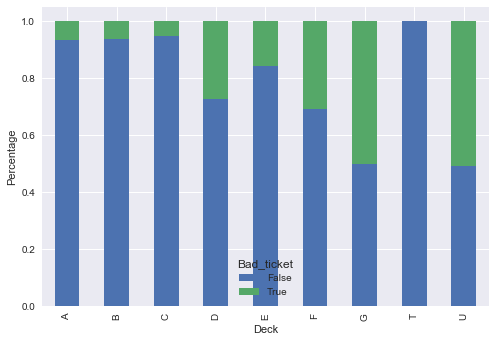

In [48]:
tab = pd.crosstab(train['Deck'], train['Bad_ticket'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
dummy = plt.xlabel('Deck')
dummy = plt.ylabel('Percentage')

bad_ticket과 Deck 사이에는 뚜렷한 상관관계가 보이지 않는다.

### * Age_known *

Survived     0    1
Age_known          
False      125   52
True       424  290


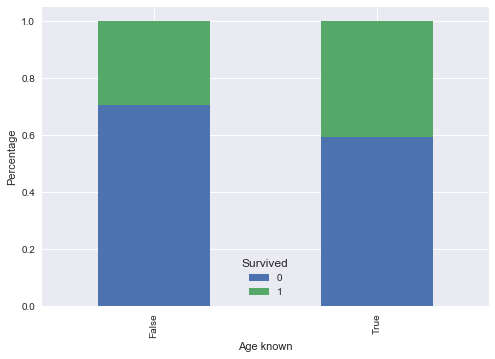

In [49]:
tab = pd.crosstab(train['Age_known'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Age known')
dummy = plt.ylabel('Percentage')

직관적으로 느껴지듯이 나이를 아는 경우가 생존확률이 더 높다. 아마 살아 남았기 때문에 그 사람의 나이를 알 수 있었으리라 짐작할 수 있다. 30% vs 40% 꽤 중요한 차이이다.

In [50]:
stats.binom_test(x=424,n=424+290,p=125/(125.+52.))

1.5623264542193693e-10

매우 작은 p-value가 나왔다. 하지만 위에서도 봤듯이 Sex와 Pclass가 불균형하게 분포하고 있을 수도 있다. 여기서도 그런지 한 번 살펴보자.

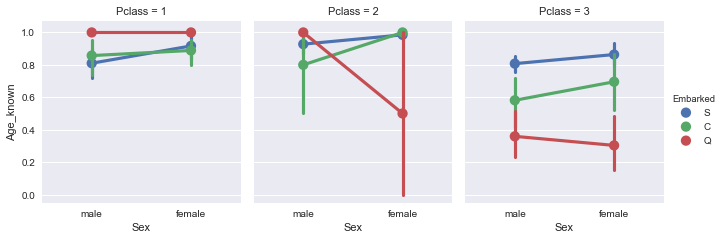

In [51]:
g = sns.factorplot(x='Sex', y='Age_known', hue='Embarked', col='Pclass',
                  data=train, aspect=0.9, size=3.5,ci=95.0)

그렇다. 여기서도 상위 class 여자 승객의 경우 나이가 더 잘 알려져있다. 
Sex와 Pclass는 여기 우리가 새로 만든 feature에 큰 영향을 끼친다.

### * Family *

Survived    0    1
Family            
0         374  163
1          72   89
2          43   59
3           8   21
4          12    3
5          19    3
6           8    4
7           6    0
10          7    0


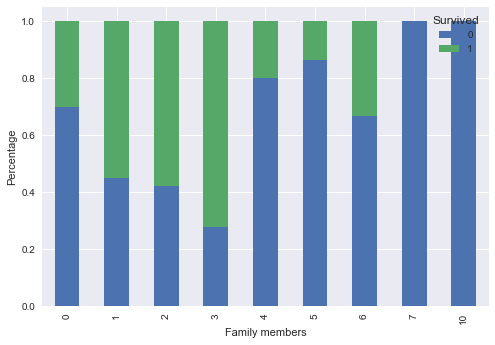

In [52]:
tab = pd.crosstab(train['Family'], train['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
dummy = plt.xlabel('Family members')
dummy = plt.ylabel('Percentage')

** 발견한 사실 **

다시한번 1~3명의 가족 구성원들이 생존률이 가장 높다. 이 변수는 SibSp와 Parch 변수를 섞어놓은 것이다. 내재된 효과를 좀 더 끄집어내야한다.

### * Alone *

Survived    0    1
Alone             
False     175  179
True      374  163


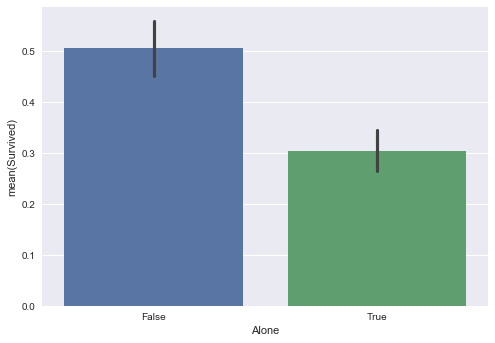

In [53]:
tab = pd.crosstab(train['Alone'], train['Survived'])
print(tab)
sns.barplot('Alone', 'Survived', data=train)

혼자 여행하는 사람들의 생존률이 더 낮다.

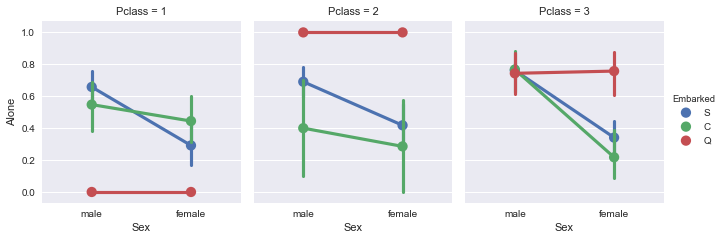

In [54]:
g = sns.factorplot(x='Sex', y='Alone', hue='Embarked', col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

하지만 남자들이 여자들보다 혼자 여행하는 비율이 높았다. 특히 3rd class에서 더 도드라져 보이는데, 모델링 단계에서 더 자세하게 살펴보자.

### * Large_Family *

Survived        0    1
Large_Family          
False         501  334
True           48    8


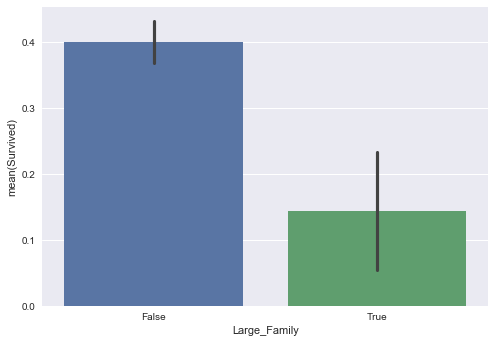

In [55]:
tab = pd.crosstab(train['Large_Family'], train['Survived'])
print(tab)
sns.barplot('Large_Family', 'Survived', data=train)

마찬가지로 큰 가족일수록 생존률이 낮게 나타난다.

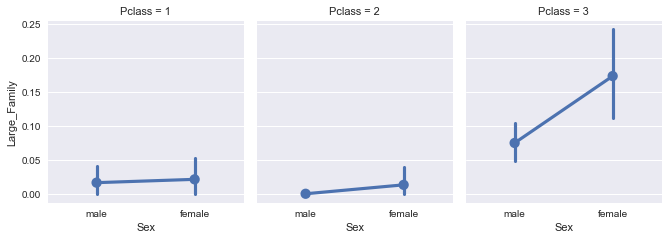

In [56]:
g = sns.factorplot(x='Sex', y='Large_Family', col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

하지만 대부분의 큰 가족들은 3rd class였다. 3rd class에서 나타나는 성비의 불균형은 아마도 앞에서 살펴본대로 많은 남자들의 홀로 여행 비율이 높은 점에서 기인하는 것이다.

### * Shared_ticket *

Survived         0    1
Shared_ticket          
0              351  130
1              198  212


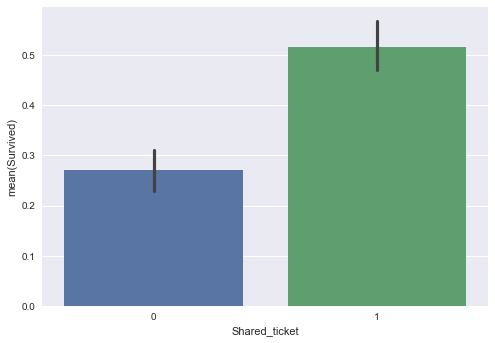

In [57]:
tab = pd.crosstab(train['Shared_ticket'], train['Survived'])
print(tab)
sns.barplot('Shared_ticket', 'Survived', data=train)

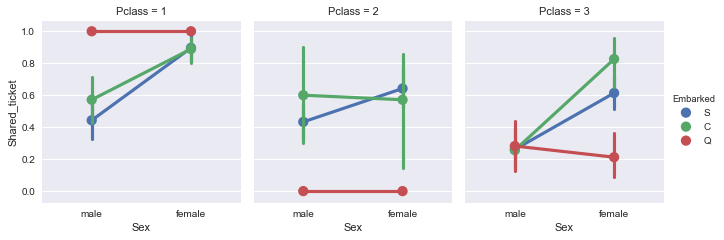

In [58]:
g = sns.factorplot(x='Sex',y='Shared_ticket',hue='Embarked',col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

다시 한 번 많은 1st class인 여자 승객들이 공유 티켓을 사용한 것을 볼 수 있다. 

** 발견한 사실 **
- 지금까지 살펴본 파생변수들은 Sex와 Pclass와 큰 관련성이 있다.

### * Title *

Title에서는 무엇을 알 수 있을까? 아마도 빠져있는 Age를 추정하는데 큰 도움이 될 것이다. combine 데이터를 사용하여 모든 title에 대해서 살펴볼 수 있도록 하자.

In [59]:
print(combine['Age'].groupby(combine['Title']).count())
print(combine['Age'].groupby(combine['Title']).mean())

print('There are {} unique titles in total.'.format(len(combine['Title'].unique())))

Title
Capt              1
Col               4
Don               1
Dona              1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           53
Miss            210
Mlle              2
Mme               1
Mr              581
Mrs             170
Ms                1
Rev               8
Sir               1
the Countess      1
Name: Age, dtype: int64
Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64
There are 18 unique titles in total.


총 18가지의 title이 존재한다. 대부분은 몇몇 소수의 사람에서만 사용되고 대부분은 Mr, Miss, Mrs, Master가 차지한다. 이 네가지에 대해 나이의 분포를 살펴보자

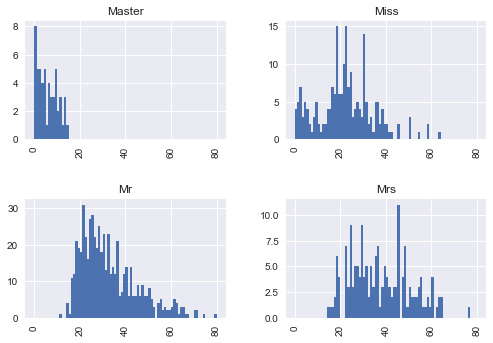

In [60]:
dummy = combine[combine['Title'].isin(['Mr','Miss','Mrs','Master'])]
foo = dummy['Age'].hist(by=dummy['Title'], bins=np.arange(0,81,1))

Survived    0    1
Young             
False     284  127
True      265  215


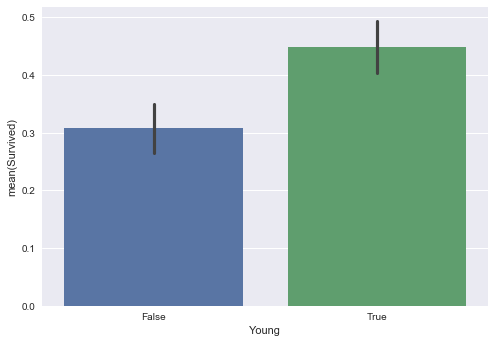

In [61]:
tab = pd.crosstab(train['Young'], train['Survived'])
print(tab)
sns.barplot('Young', 'Survived', data=train)

Pclass    1    2    3
Young                
False   135   78  198
True     81  106  293


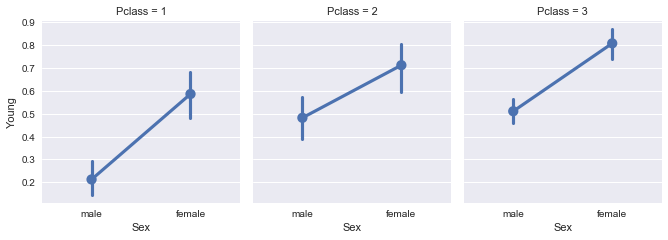

In [62]:
tab = pd.crosstab(train['Young'], train['Pclass'])
print(tab)
g = sns.factorplot(x='Sex',y='Young',col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

### *Fare_cat*

(0, 2.1108666950988435)

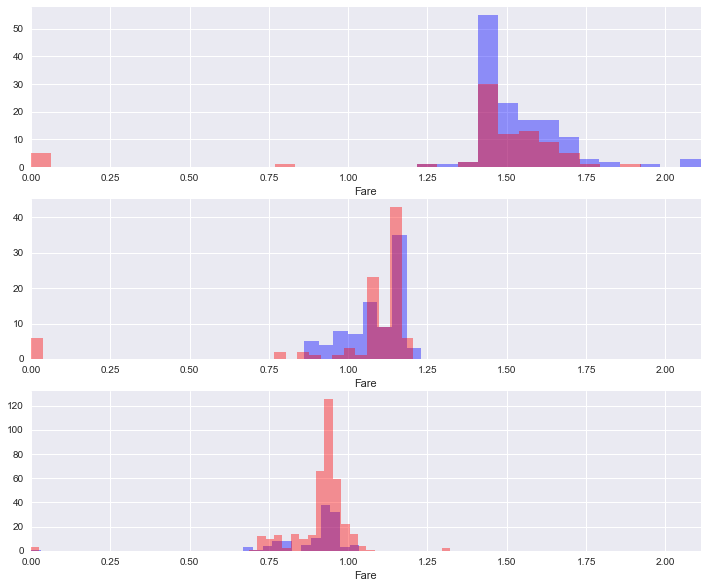

In [63]:
plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==1].dropna().values+1),kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==1].dropna().values+1),kde=False, color=nosurv_col, axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values+1)))
plt.subplot(312)
ax1 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==2].dropna().values+1),kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==2].dropna().values+1),kde=False, color=nosurv_col, axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values+1)))
plt.subplot(313)
ax1 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==3].dropna().values+1),kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==3].dropna().values+1),kde=False, color=nosurv_col, axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(train['Fare_eff'].dropna().values+1)))

In [64]:
pd.DataFrame(np.floor(np.log10(train['Fare']+1))).astype('int').head(5)

,Fare
0,0
1,1
2,0
3,1
4,0


Survived    0    1
Fare_cat          
0         249   62
1         286  241
2          14   39


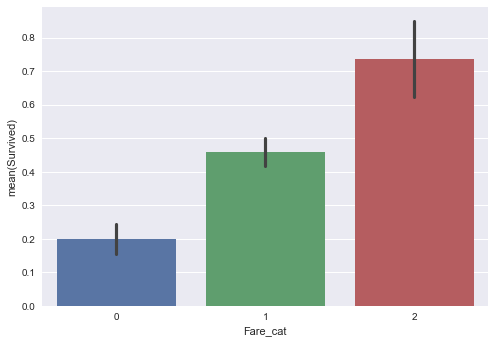

In [65]:
tab = pd.crosstab(train['Fare_cat'], train['Survived'])
print(tab)
sns.barplot('Fare_cat', 'Survived', data=train)

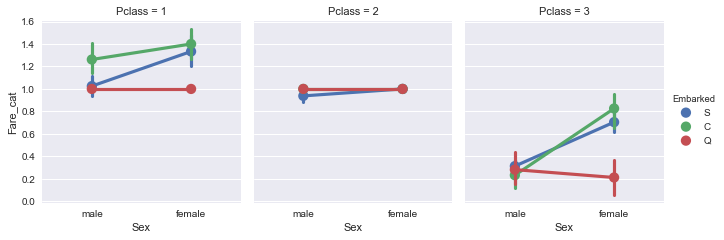

In [66]:
g = sns.factorplot(x='Sex', y='Fare_cat', hue='Embarked', col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

### * Fare_eff_cat *

요금이 어떻게 발생하는지 더 자세히 알아보자. 먼저 각 그룹의 승객은 같은 요금인지 확인해보자.

2

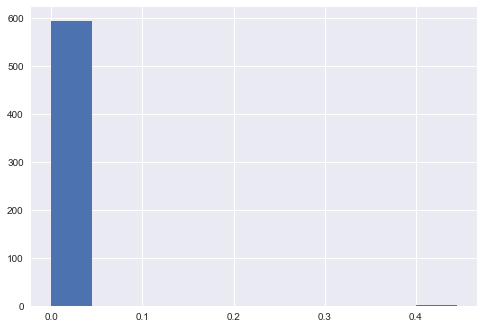

In [71]:
combine.groupby('Ticket')['Fare'].transform('std').hist()
np.sum(combine.groupby('Ticket')['Fare'].transform('std')>0)

거의 100% 맞다. 그런데 0.4 값을 갖는 것은 무엇일까?

In [72]:
combine.iloc[np.where(combine.groupby('Ticket')['Fare'].transform('std')>0)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
138,16.0,NaN,S,9.2167,"Osen, Mr. Olaf Elon",0,139,3,male,0,...,U,7,Mr,1,True,True,1,2,4.60835,0
876,20.0,NaN,S,9.8458,"Gustafsson, Mr. Alfred Ossian",0,877,3,male,0,...,U,7,Mr,1,True,True,1,2,4.92290,0


확인해보니 Mr. Osen가 Mr. Gustafsson 두 승객의 요금이 서로 다르다. 하지만 정말 근소한 차이이므로 그냥 넘어가자.

Fare_eff: 티켓 / 사람수

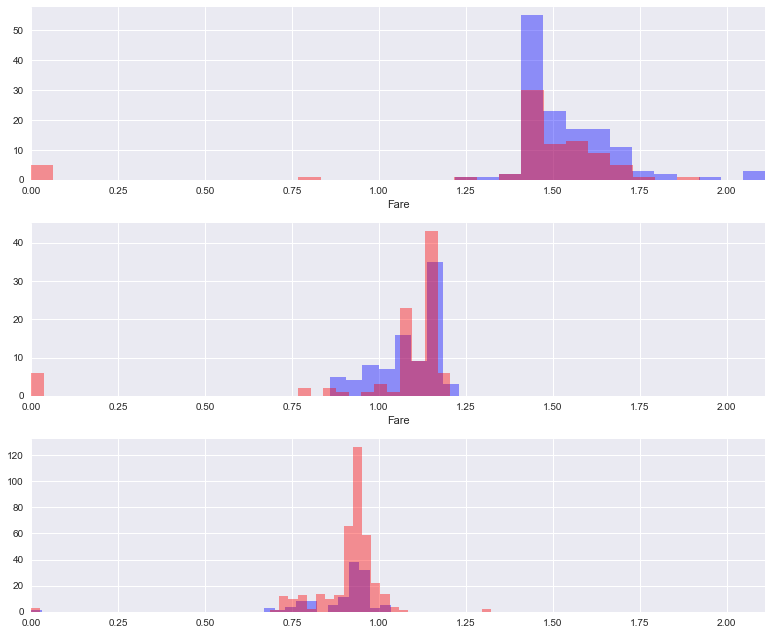

In [77]:
plt.figure(figsize=[12,10])
plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_col)
ax1 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax1.set_xlim(0, np.max(np.log10(train['Fare_eff'].dropna().values+1)))

plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_col)
ax2 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_col, axlabel='Fare')
ax2.set_xlim(0, np.max(np.log10(train['Fare_eff'].dropna().values+1)))

plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare_eff'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_col)
ax3 = sns.distplot(np.log10(nosurv['Fare_eff'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_col)
ax3.set_xlim(0, np.max(np.log10(train['Fare_eff'].dropna().values+1)))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

분산이 눈에 띄게 좁아졌고 bimodality와 tail 경향이 약해졌다. 표준편차를 비교해보자:

In [78]:
print(combine[combine['Fare']>1].groupby('Pclass')['Fare'].std())
print(combine[combine['Fare_eff']>1].groupby('Pclass')['Fare_eff'].std())

Pclass
1    80.259713
2    13.382064
3    11.476600
Name: Fare, dtype: float64
Pclass
1    14.675124
2     2.031927
3     1.366691
Name: Fare_eff, dtype: float64


아웃라이어들을 살펴보자.

In [79]:
combine[(combine['Pclass']==1) & (combine['Fare_eff']>0) & (combine['Fare_eff']<10)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
872,33.0,B51 B53 B55,S,5.0,"Carlsson, Mr. Frans Olof",0,873,1,male,0,...,B,6,Mr,0,True,False,0,1,5.0,0


1st class 티켓 치고는 굉장히 저렴한 가격이다.

In [86]:
combine[(combine['Pclass']==3)&(np.log10(combine['Fare_eff'])>1.2)]

C:\Users\poioi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,fare_per_person,Child,Cabin_known,Age_known,Family,Alone,Large_Family,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
451,NaN,NaN,S,19.9667,"Hagland, Mr. Ingvald Olai Olsen",0,452,3,male,1,65303,9.98335,False,False,False,1,False,False,U,6,Mr,1,True,False,0,1,19.9667,2
490,NaN,NaN,S,19.9667,"Hagland, Mr. Konrad Mathias Reiersen",0,491,3,male,1,65304,9.98335,False,False,False,1,False,False,U,6,Mr,1,True,False,0,1,19.9667,2


이번에는 3rd class 티겟이 굉장히 비싸다. 아마 두 티켓은 공유 티켓일 것이라고 생각이 되는데 티켓 이름이 조금 다르다. 그렇지만 아주 큰 영향이 있을 것 같지는 않다.

중요한 건 Fare_eff가 실제 fare보다 더 좋은 변수라는 꽤 그럴듯한 이유가 있다. 일단 Pclass로 나눠서 보자.

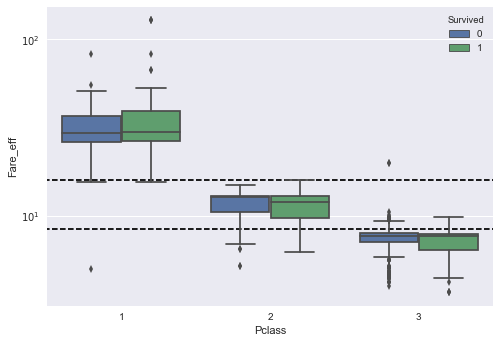

In [88]:
ax = sns.boxplot(x='Pclass', y='Fare_eff', hue='Survived', data=train)
ax.set_yscale('log')
ax.hlines([8.5,16],-1,4, linestyles='dashed')

다시 보니 사실 새로운 Fare_eff는 없어도 될 것 같다. 왜냐면 이미 Pclass가 구분을 하고 있기 때문이다. 하지만 낙관적으로 문제를 바라보자. 우리는 점선으로 Fare_eff를 구간별로 나누어 Fare_eff_cat를 만들었다.

Survived        0    1
Fare_eff_cat          
0             346  120
1             128   87
2              75  135


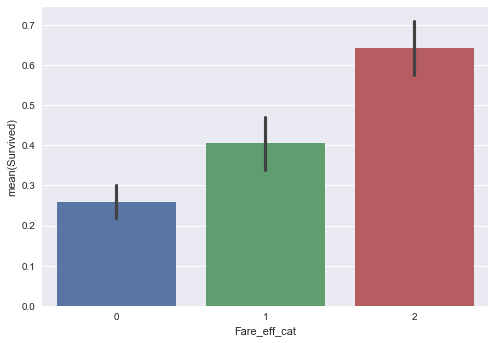

In [89]:
tab = pd.crosstab(train['Fare_eff_cat'], train['Survived'])
print(tab)
sns.barplot('Fare_eff_cat', 'Survived', data=train)

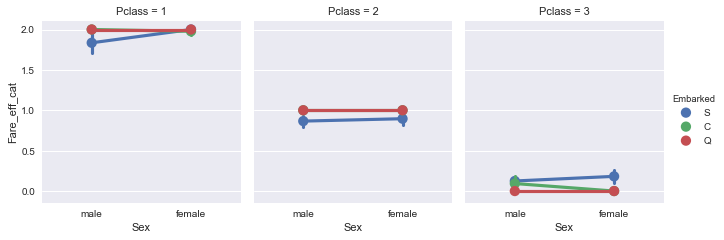

In [90]:
g = sns.factorplot(x='Sex', y='Fare_eff_cat', hue='Embarked', col='Pclass',
                  data=train, aspect=0.9, size=3.5, ci=95.0)

# ** 6. Preparing for modeling **

여러 모델에 데이터를 정의하기 전에 카테고리열의 값을 정수값으로 변환해주자.

In [92]:
combine= pd.concat([train.drop('Survived',1), test])
survived = train['Survived']

combine['Sex'] = combine['Sex'].astype('category')
combine['Sex'].cat.categories = [0,1]
combine['Sex'] = combine['Sex'].astype('int')
combine['Embarked'] = combine['Embarked'].astype('category')
combine['Embarked'].cat.categories = [0,1,2]
combine['Embarked'] = combine['Embarked'].astype('int')
combine['Deck'] = combine['Deck'].astype('category')
combine['Deck'].cat.categories = [0,1,2,3,4,5,6,7,8]
combine['Deck'] = combine['Deck'].astype('int')

test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Survived'] = survived

train.loc[:,['Sex','Embarked']].head()

C:\Users\poioi\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [91]:
combine.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,fare_per_person,Child,Cabin_known,Age_known,Family,Alone,Large_Family,Deck,Ttype,Title,Fare_cat,Bad_ticket,Young,Shared_ticket,Ticket_group,Fare_eff,Fare_eff_cat
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,3.62500,False,False,True,1,False,False,U,A,Mr,0,True,True,0,1,7.25000,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,35.64165,False,True,True,1,False,False,C,P,Mrs,1,False,False,1,2,35.64165,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,7.92500,False,False,True,0,True,False,U,S,Miss,0,False,True,0,1,7.92500,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,26.55000,False,True,True,1,False,False,C,1,Mrs,1,False,False,1,2,26.55000,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,8.05000,False,False,True,0,True,False,U,3,Mr,0,True,False,0,1,8.05000,0


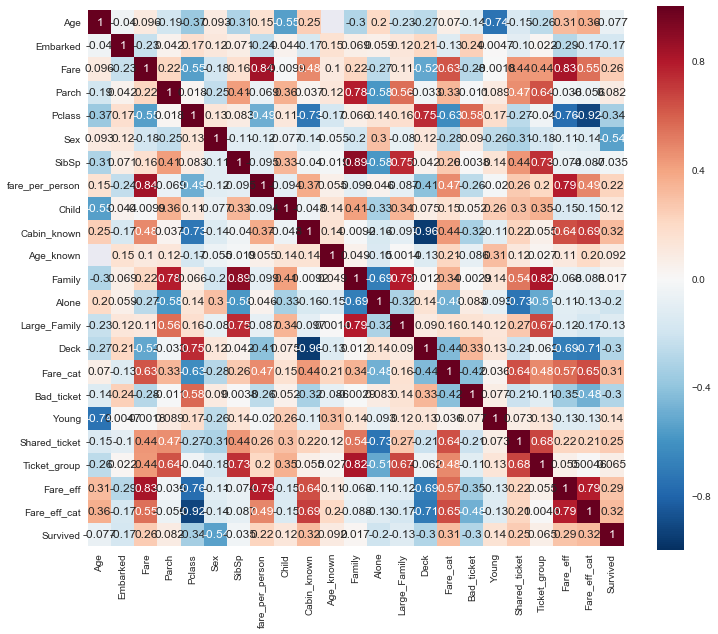

In [93]:
ax = plt.subplots(figsize=(12,10))
foo = sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=1.0, square=True, annot=True)